In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, scale

In [2]:
data = pd.read_csv("C:\python_data\winequality-red.csv", sep=",")

X_columns = list(filter(lambda col: col != 'quality', data.columns))
set(data['quality'])

{3, 4, 5, 6, 7, 8}

In [40]:
def quality(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1))
    print("F1:", f1_score(y_test, y_pred, average='macro')) 


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data['quality'], test_size=0.2)

<BarContainer object of 6 artists>

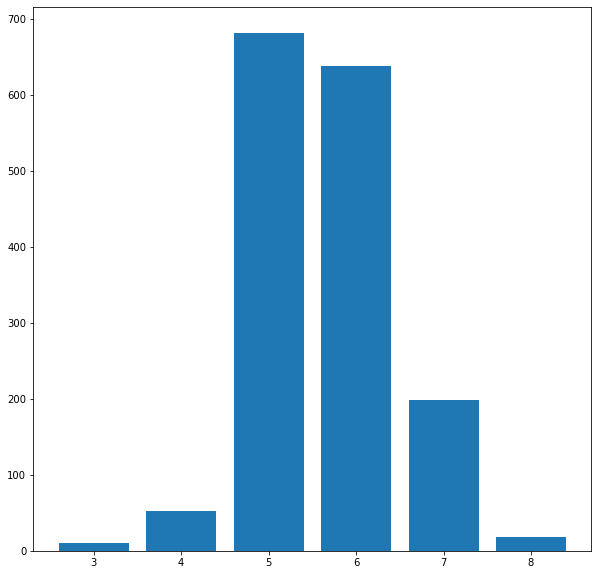

In [42]:
y = list(range(3,9))
x = list()
for _class in y:
    x.append(len(list(filter(lambda val: val == _class, data['quality']))))
plt.figure(figsize=(10,10))
plt.bar(y, x)

<BarContainer object of 6 artists>

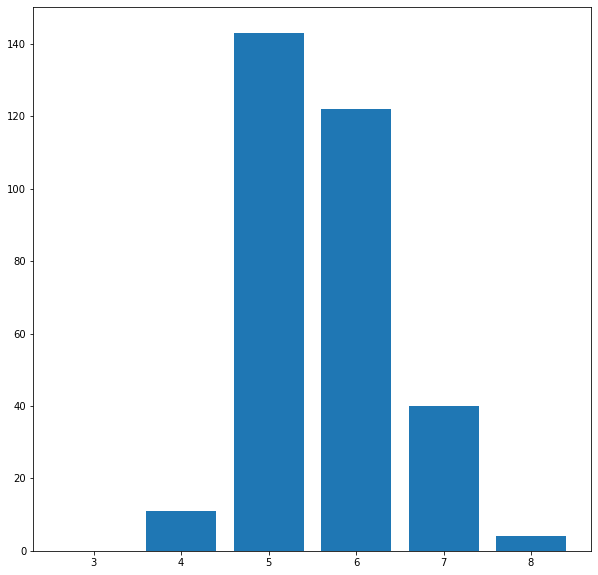

In [43]:
y = list(range(3,9))
x = list()
for _class in y:
    x.append(len(list(filter(lambda val: val == _class, y_test))))
plt.figure(figsize=(10,10))
plt.bar(y, x)

In [6]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([5, 5, 6, 6, 6, 5, 5, 7, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 5, 5, 7,
       5, 6, 5, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 7, 5, 7, 7,
       7, 7, 6, 5, 5, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7, 8,
       7, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 7, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 5, 7, 7, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6,
       7, 6, 7, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5,
       6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 7, 7, 5, 5, 5, 6,
       6, 7, 5, 5, 6, 7, 5, 6, 6, 6, 6, 7, 6, 7, 6,

In [7]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   2,   1,   0],
       [  0,   0,   6,   3,   1,   0],
       [  0,   0, 102,  45,   3,   0],
       [  0,   0,  30,  69,   9,   0],
       [  0,   0,  12,  10,  19,   1],
       [  0,   0,   1,   3,   2,   0]], dtype=int64)

<BarContainer object of 6 artists>

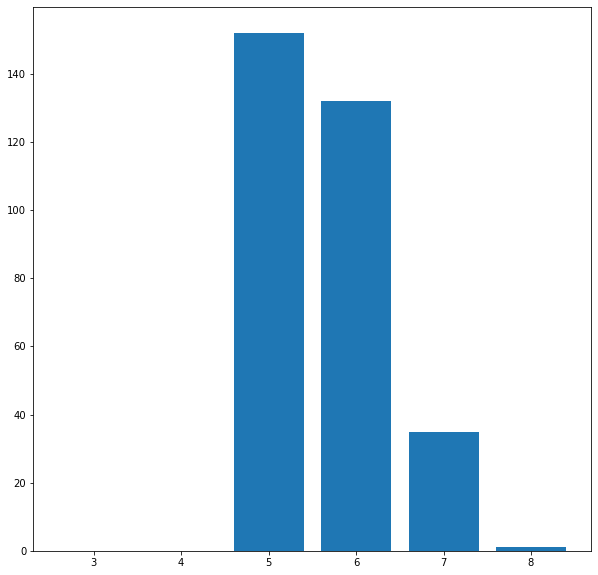

In [8]:
y = list(range(3,9))
x = list()
for _class in y:
    x.append(len(list(filter(lambda val: val == _class, y_pred))))
plt.figure(figsize=(10,10))
plt.bar(y, x)

In [9]:
quality(y_test, y_pred)

Accuracy: 0.59375
Recall: 0.2952116402116402
Precision: 0.6227728411938939
F1: 0.29066719704136923


In [10]:
def metrics_print(y_test, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1))
    print("F1:", f1_score(y_test, y_pred, average='macro'))
    print("ROC AUC:", roc_auc_score(y_test, y_prob, average='macro', multi_class='ovr'))

In [11]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [12]:
metrics_print(y_test, y_pred, y_prob)

Accuracy: 0.55625
Recall: 0.31336860670194006
Precision: 0.6776119685584606
F1: 0.33874999501099573
ROC AUC: 0.7772312451916804


In [13]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  3,  1,  0,  0],
       [ 0,  1,  7,  1,  1,  0],
       [ 0,  1, 96, 50,  3,  0],
       [ 0,  0, 29, 64, 15,  0],
       [ 0,  0,  6, 20, 16,  0],
       [ 0,  0,  0,  2,  3,  1]], dtype=int64)

<BarContainer object of 11 artists>

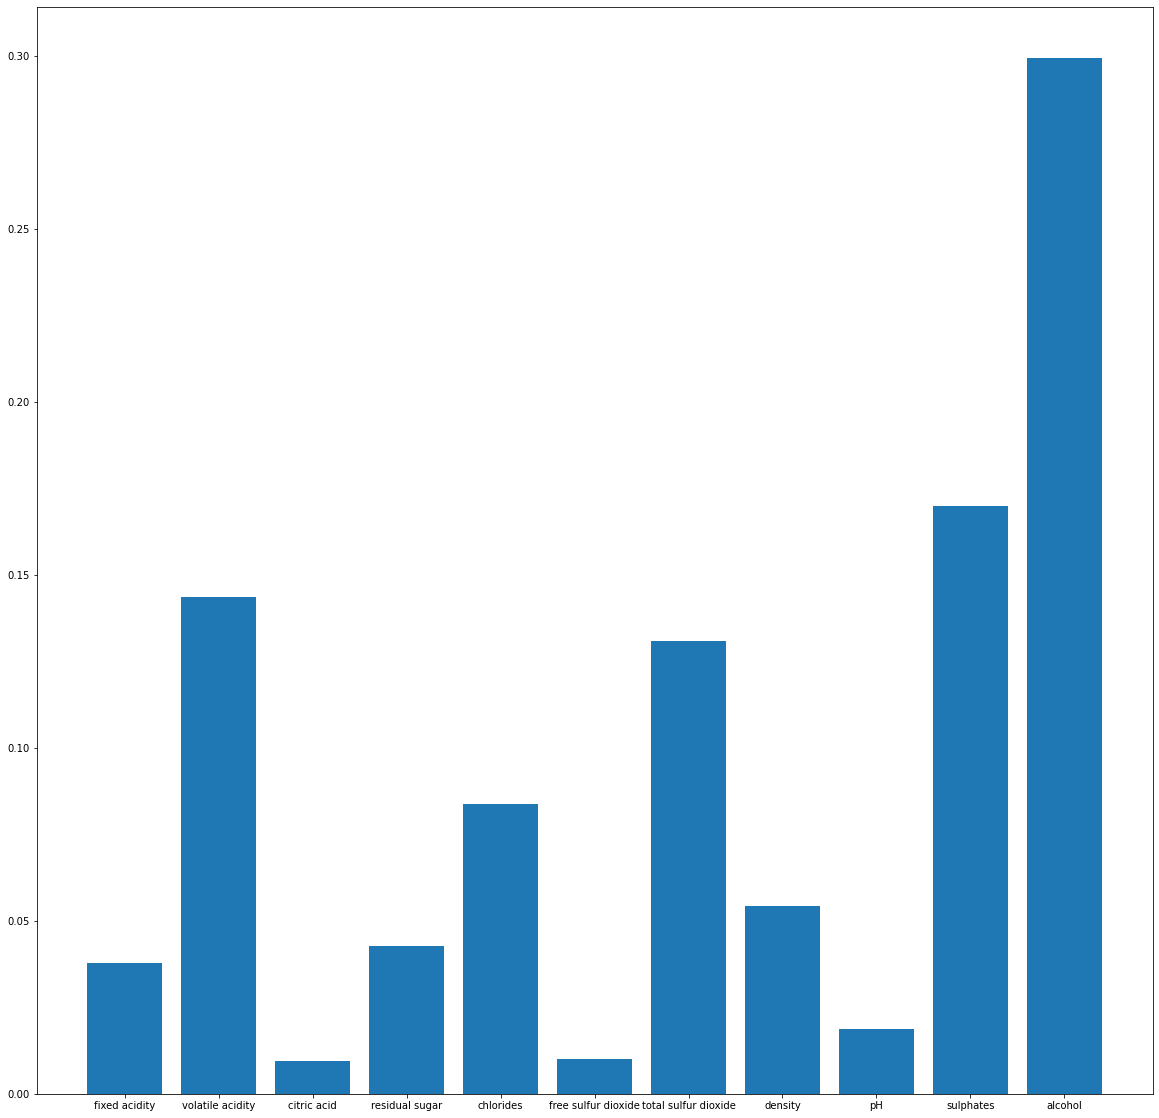

In [14]:
plt.figure(figsize=(20,20))
plt.bar(X_columns, dt.feature_importances_)

<BarContainer object of 6 artists>

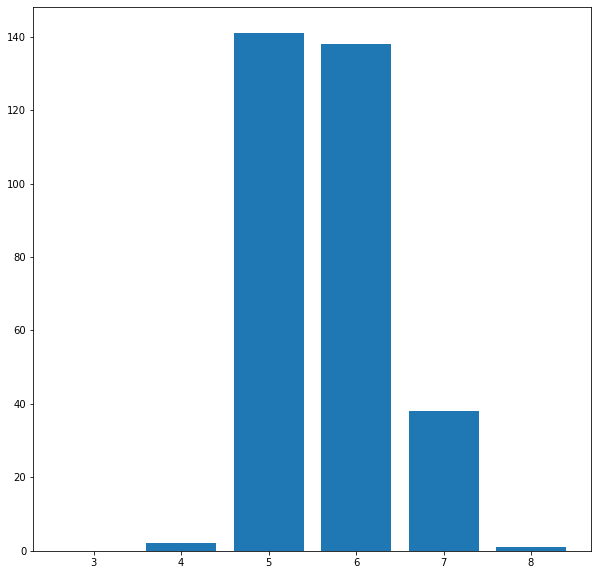

In [15]:
y = list(range(3,9))
x = list()
for _class in y:
    x.append(len(list(filter(lambda val: val == _class, y_pred))))
plt.figure(figsize=(10,10))
plt.bar(y, x)

In [16]:
logreg = LogisticRegression(penalty='l1', max_iter=10000, solver='liblinear', C=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)


In [17]:
metrics_print(y_test, y_pred, y_prob)

Accuracy: 0.58125
Recall: 0.24634920634920635
Precision: 0.7510755356995119
F1: 0.23169173625563078
ROC AUC: 0.7750670392373745


In [18]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   4,   0,   0,   0],
       [  0,   0,   6,   3,   1,   0],
       [  0,   0, 111,  38,   1,   0],
       [  0,   0,  35,  72,   1,   0],
       [  0,   0,   2,  37,   3,   0],
       [  0,   0,   0,   3,   3,   0]], dtype=int64)

<BarContainer object of 6 artists>

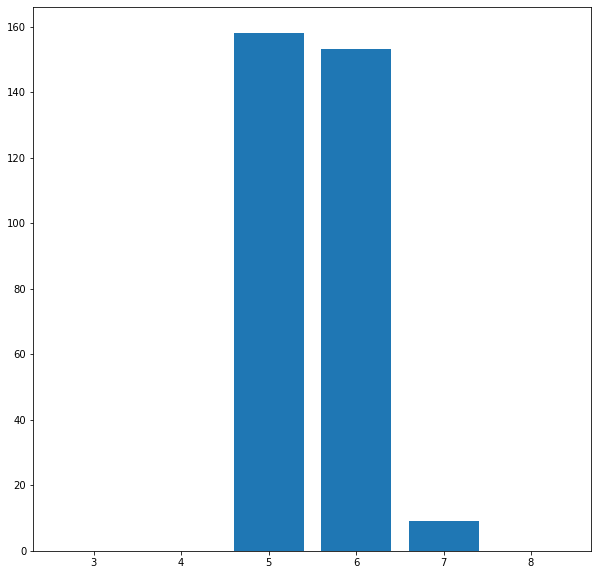

In [19]:
y = list(range(3,9))
x = list()
for _class in y:
    x.append(len(list(filter(lambda val: val == _class, y_pred))))
plt.figure(figsize=(10,10))
plt.bar(y, x)


In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   2,   0,   0],
       [  0,   0,   6,   4,   0,   0],
       [  0,   0, 108,  38,   4,   0],
       [  0,   0,  30,  64,  14,   0],
       [  0,   0,   1,  18,  21,   2],
       [  0,   0,   0,   1,   5,   0]], dtype=int64)

In [23]:
quality(y_test, y_pred)

Accuracy: 0.603125
Recall: 0.30209876543209874
Precision: 0.6193172687829606
F1: 0.29338761189330215


1 задание результат:

Так как изночально в дынных было мало объектов с классами 3 и 8, то у моделей возникли проблемы с определением этиъ классов. При этом все модели достаточно хорошо определяют 5 и 6 классы, что видно из confusion matrix

В этой задаче нужно учитывать True Negative и Flase Positive случай, поэтому наиболее подходящей метрикой будет F1, которая это учитывает, а также плотность м полноту

Исходя из F1 метрики наилучшей была модель DecisionTree

Самый влиятельный признак был alhocol, менее важные, но тоже значимые были sulphates, sulfur dioxide и volitile acidity

На примере KNN модели стандартизация помогла улучшить качество модели, что видно в улучшении всех метрик

In [24]:
data['quality'] = np.where(data['quality'] > 6.5, 1, data['quality'])
data['quality'] = np.where(data['quality'] != 1, 0, data['quality'])

In [25]:
X_columns = list(filter(lambda col: col != 'quality', data.columns))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data['quality'], test_size=0.2)

In [27]:
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [28]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [29]:
quality(y_test, y_pred)

Accuracy: 0.90625
Recall: 0.6945454545454546
Precision: 0.8834209268991877
F1: 0.7465948685460881


In [30]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)


In [31]:
metrics_print(y_test, y_pred, y_prob[:, 1])

Accuracy: 0.871875
Recall: 0.7024242424242424
Precision: 0.7337625979843225
F1: 0.7162077393956436
ROC AUC: 0.8282424242424242


In [32]:
confusion_matrix(y_test, y_pred)

array([[258,  17],
       [ 24,  21]], dtype=int64)

<BarContainer object of 11 artists>

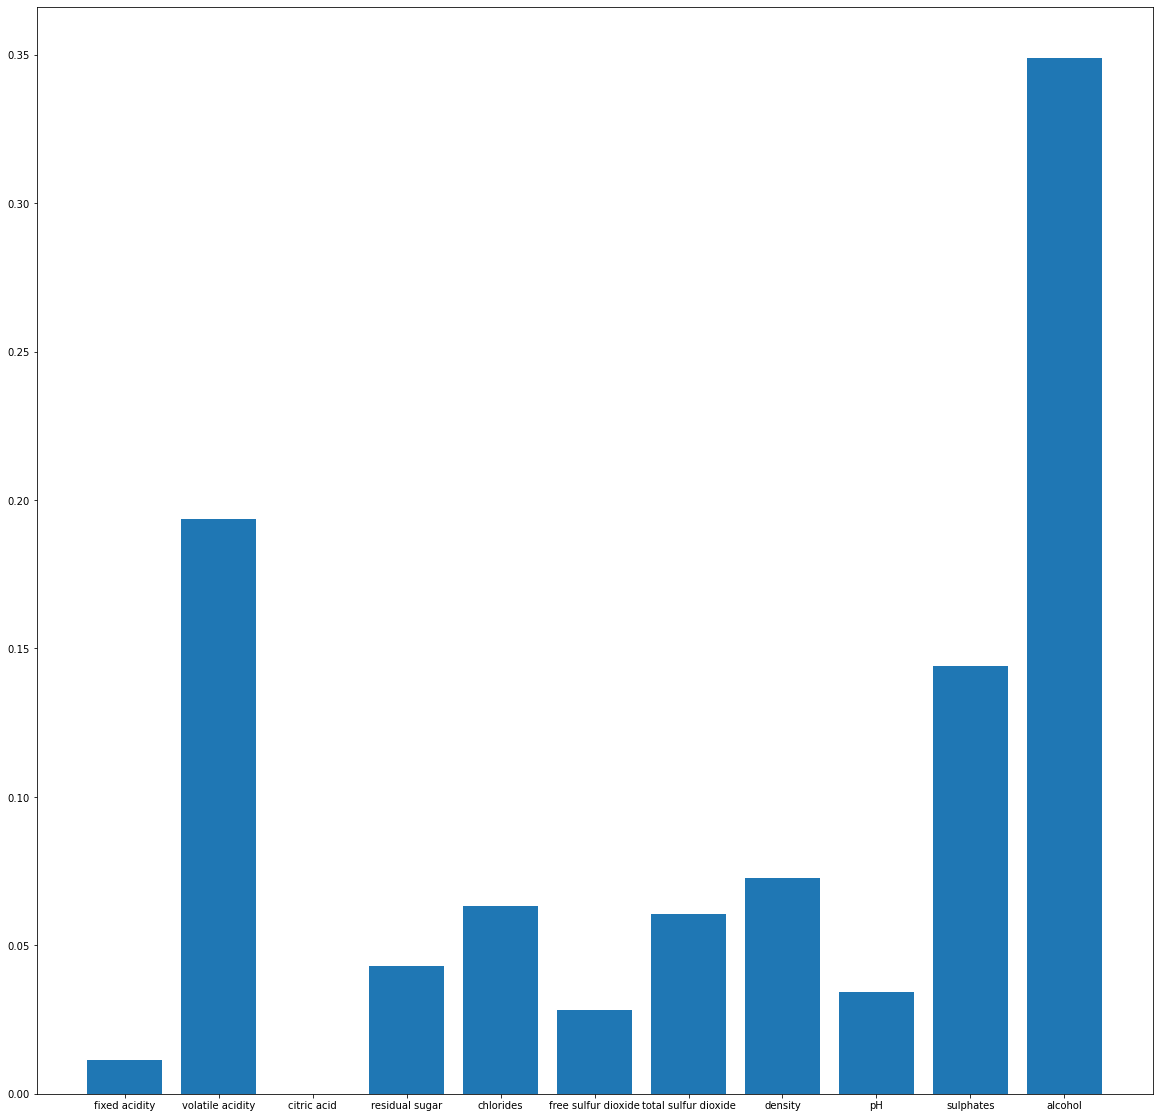

In [33]:
plt.figure(figsize=(20,20))
plt.bar(X_columns, dt.feature_importances_)

In [34]:
svc = SVC(C=10000.0, kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_proba = svc.predict_proba(X_test)
metrics_print(y_test, y_pred, y_prob[:, 1])

Accuracy: 0.865625
Recall: 0.6430303030303031
Precision: 0.7164872798434443
F1: 0.6675605808025898
ROC AUC: 0.8282424242424242


In [35]:
sc = StandardScaler()

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[263,  12],
       [ 19,  26]], dtype=int64)

In [38]:
quality(y_test, y_pred)

Accuracy: 0.903125
Recall: 0.767070707070707
Precision: 0.8084173198954834
F1: 0.7854253639332914


Так как в этой задаче ненужно учитывать  True negative и False positive, то наиболее оптимальная ьудет Accurace метрика. Поэтому наиболее качественная модель по этой метрике будет KNN, так же можно добавить, что SVC модель при данных параметрах обучается долго, поэтому при дынных параметрах её неоптимально использовать даже, если будет лучшая точность/

Наиболее важгой характеристикой  также остался alhocol, при этом sulphates и volitile acidity осталась на том же уровне, а важность sulfur dioxide упала, таже признак citric acid стал вообще незначимым

На примеме KNN стандартизация улучшает качество модели по всем метрикам